In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [131]:
df = pd.read_csv('bank1 - bank.csv.csv')

In [133]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [135]:
df.shape

(4521, 17)

In [136]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [137]:
X=df.drop(['y'],axis=1)
y=df['y']

In [138]:
for colm in df.select_dtypes(include='object').columns:
    print(colm)
    print(df[colm].unique())

job
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
marital
['married' 'single' 'divorced']
education
['primary' 'secondary' 'tertiary' 'unknown']
default
['no' 'yes']
housing
['no' 'yes']
loan
['no' 'yes']
contact
['cellular' 'unknown' 'telephone']
month
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


In [139]:
features_n = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_n:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values found')
else:
    print("No missing value")


No missing value


In [140]:
for column in df.columns:
    print(column,df[column].nunique())

age 67
job 12
marital 3
education 4
default 2
balance 2353
housing 2
loan 2
contact 3
day 31
month 12
duration 875
campaign 32
pdays 292
previous 24
poutcome 4
y 2


In [141]:
categ_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['y']))]
categ_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [142]:
for feature in categ_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4


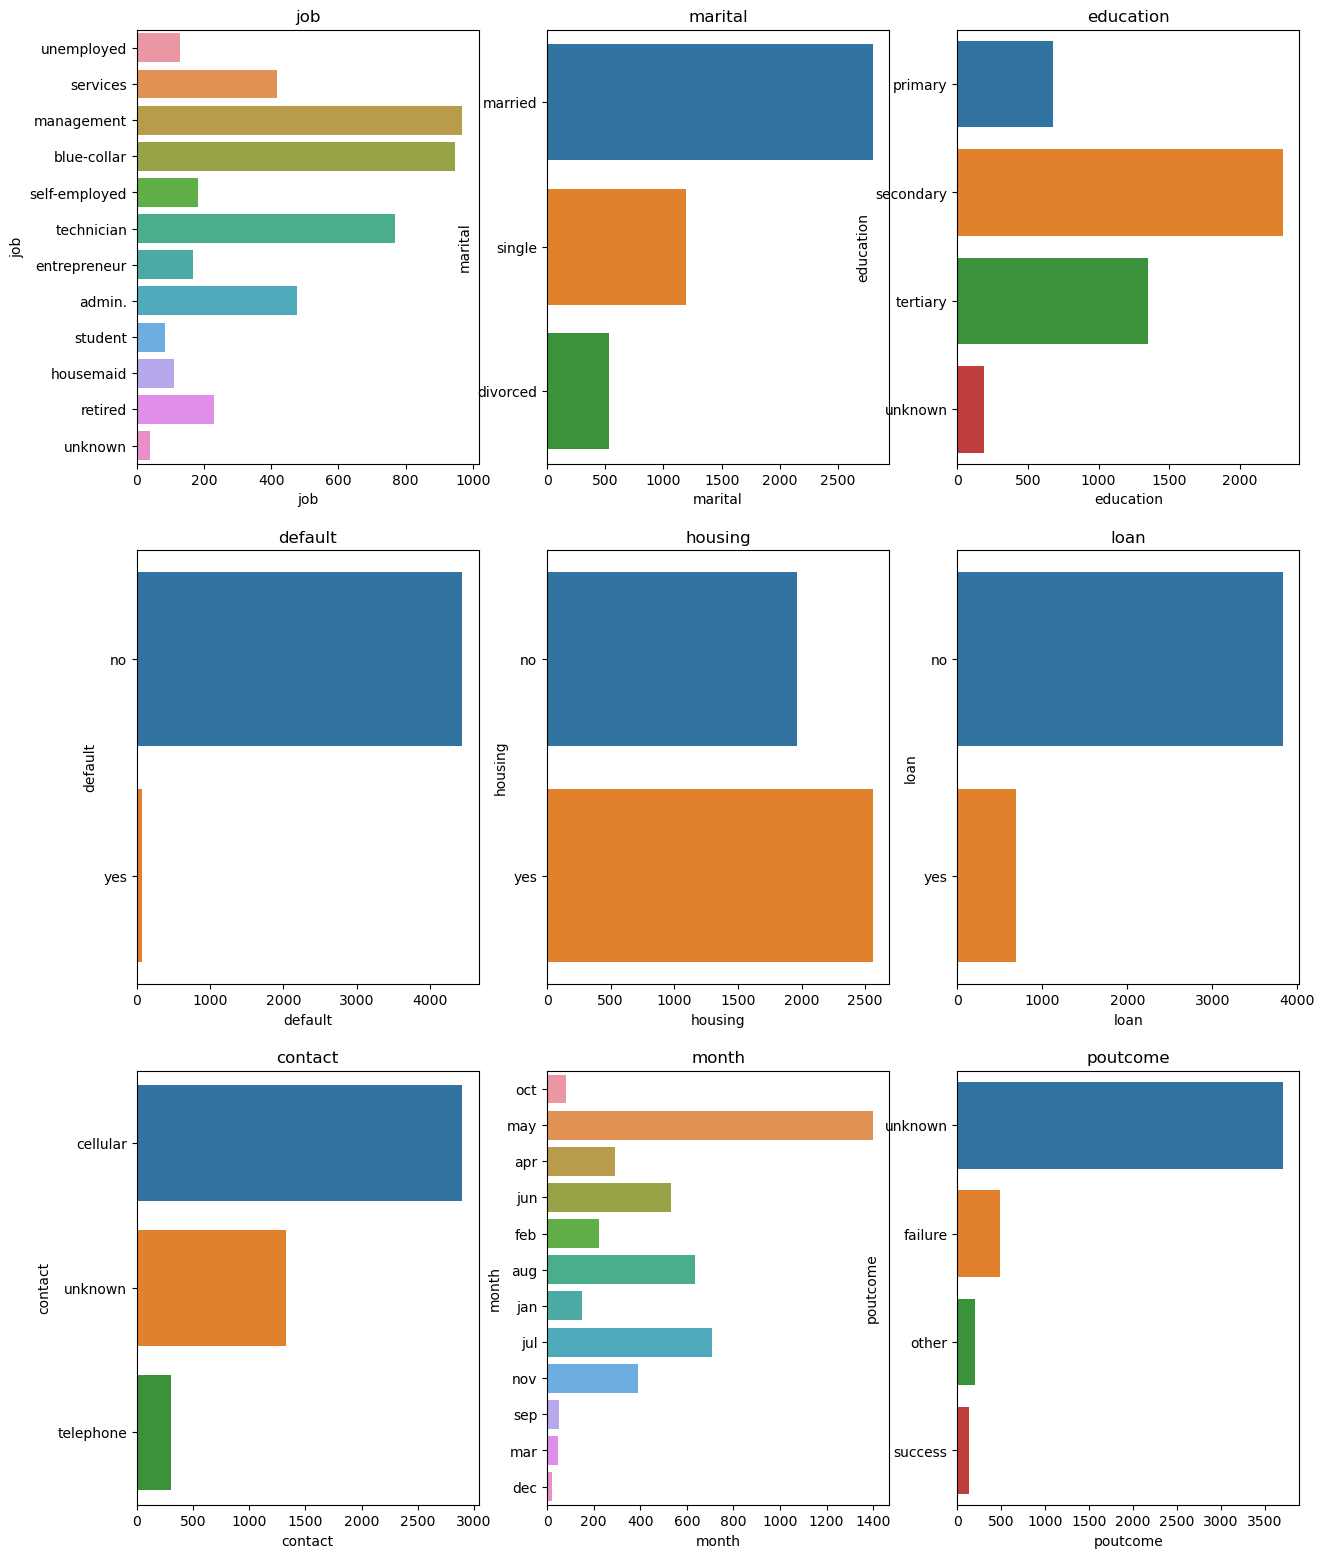

In [143]:
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categ_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

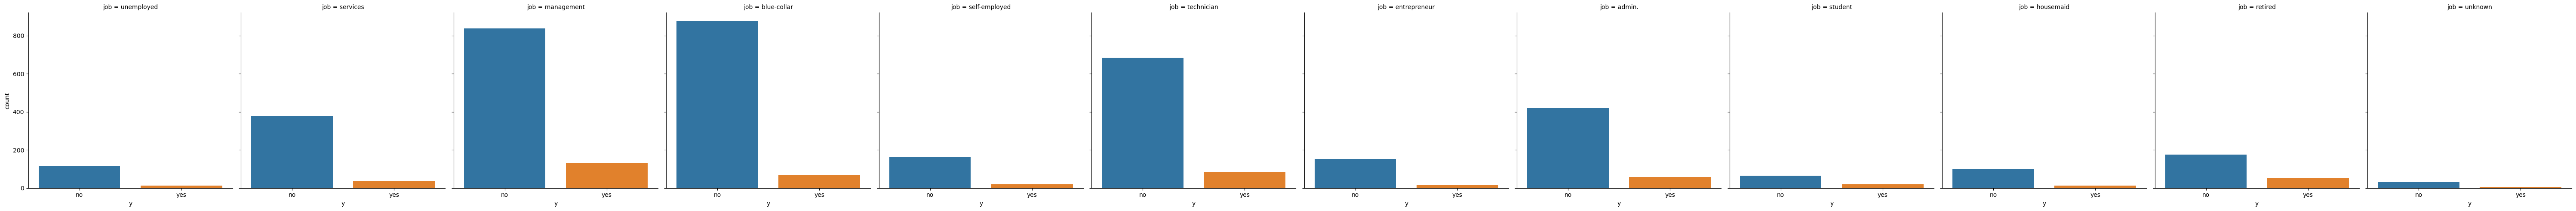

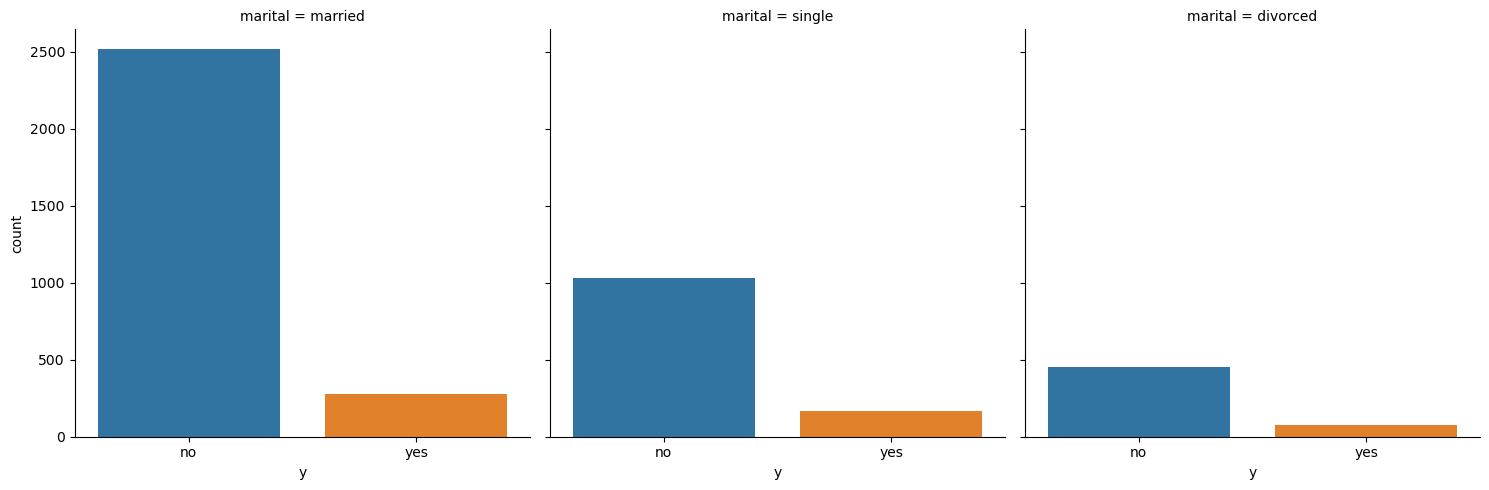

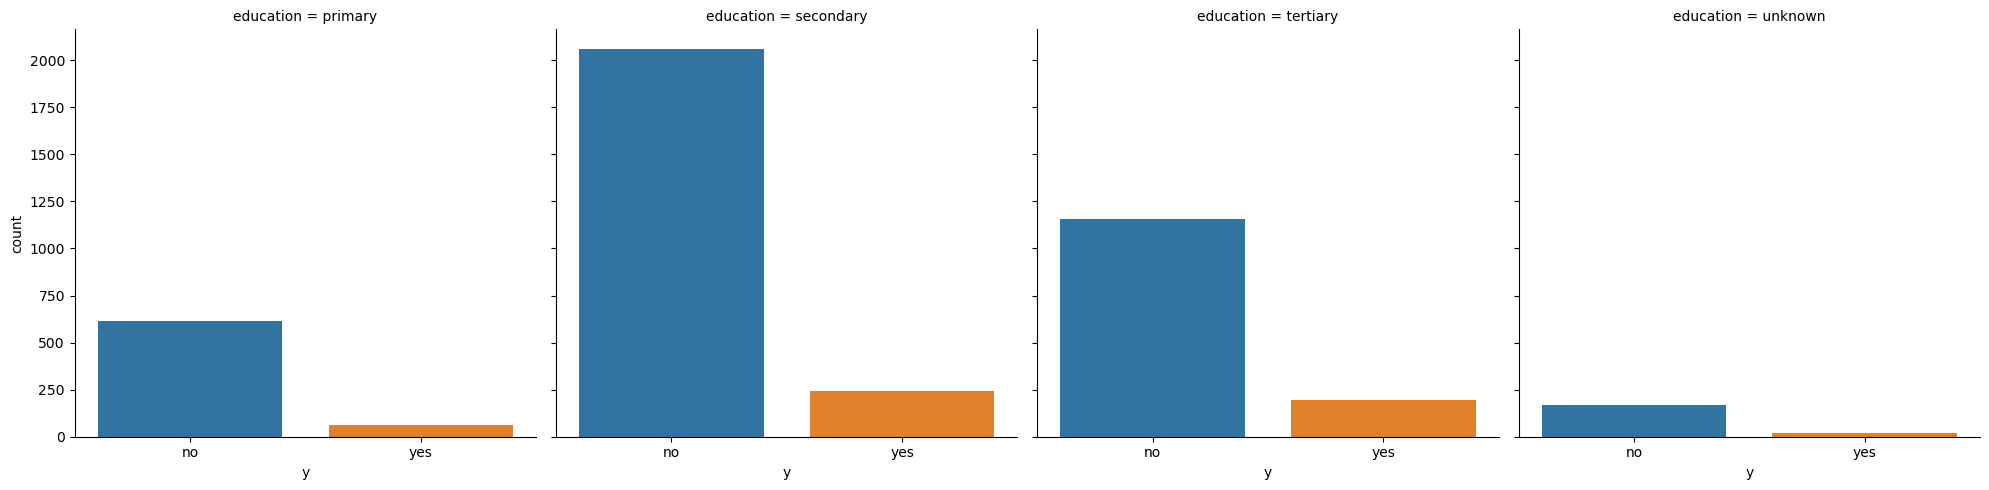

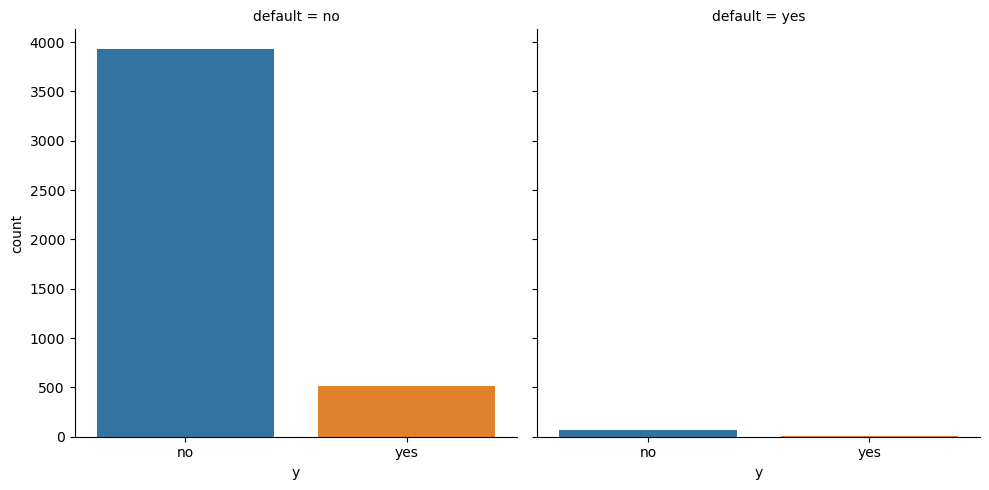

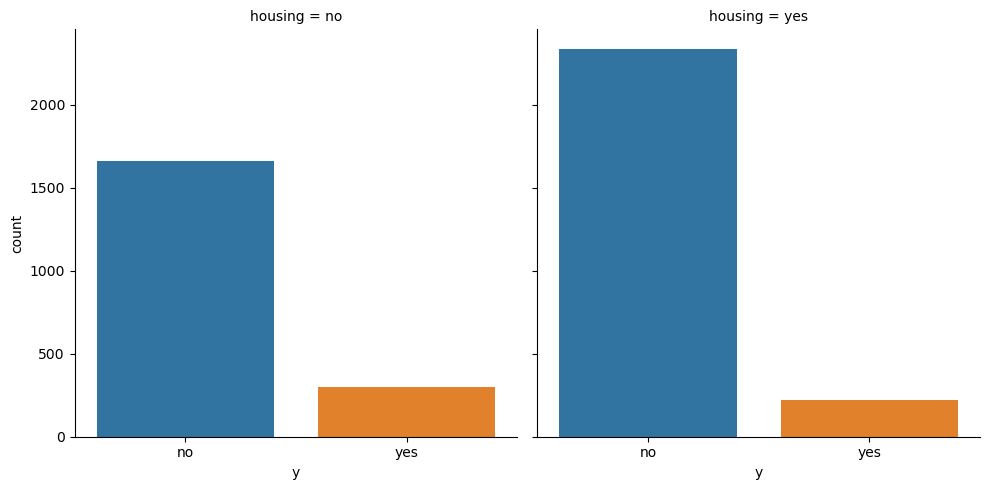

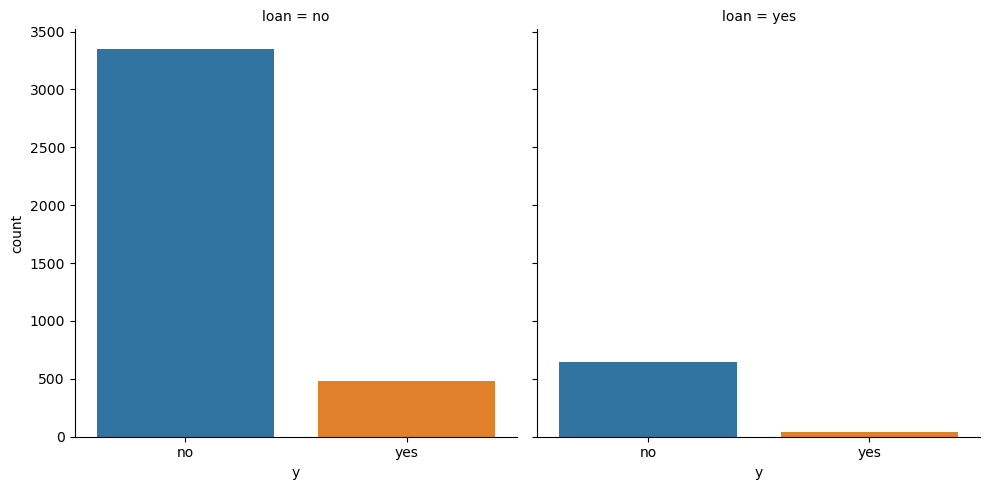

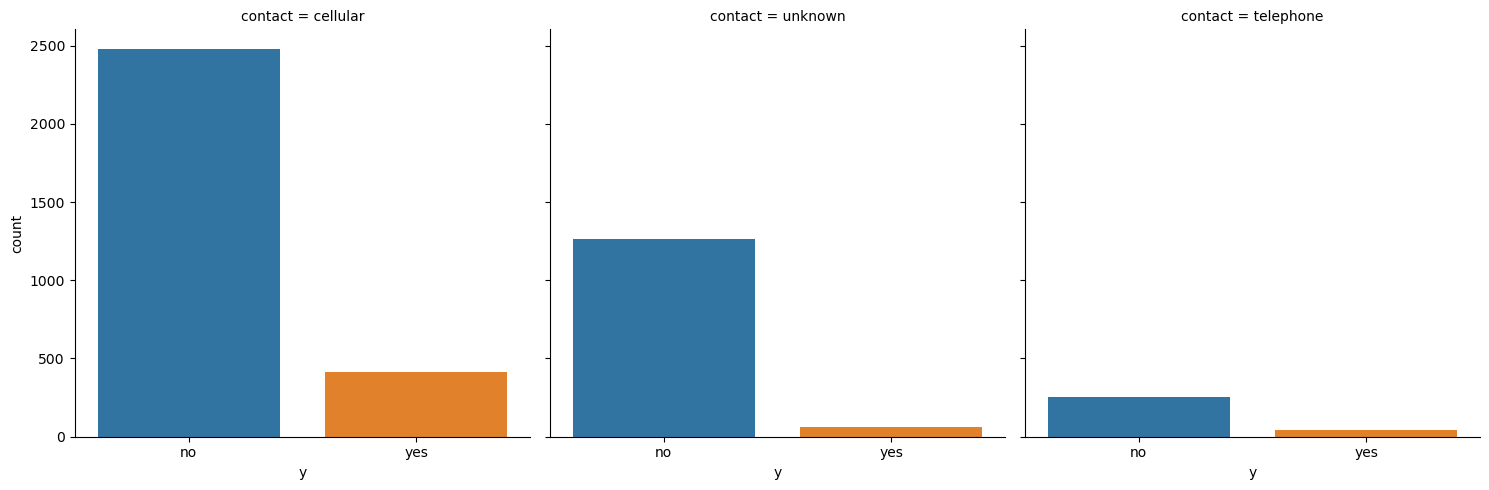

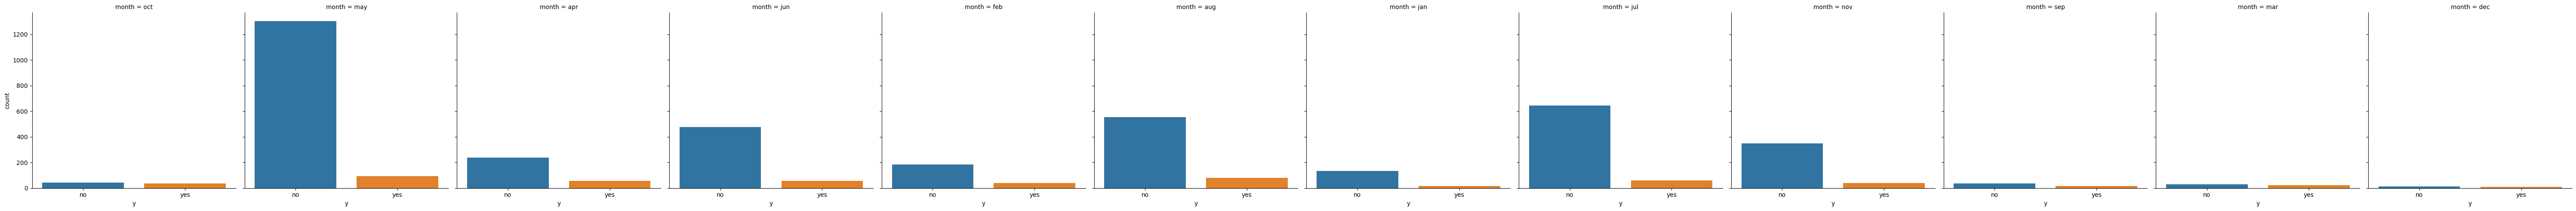

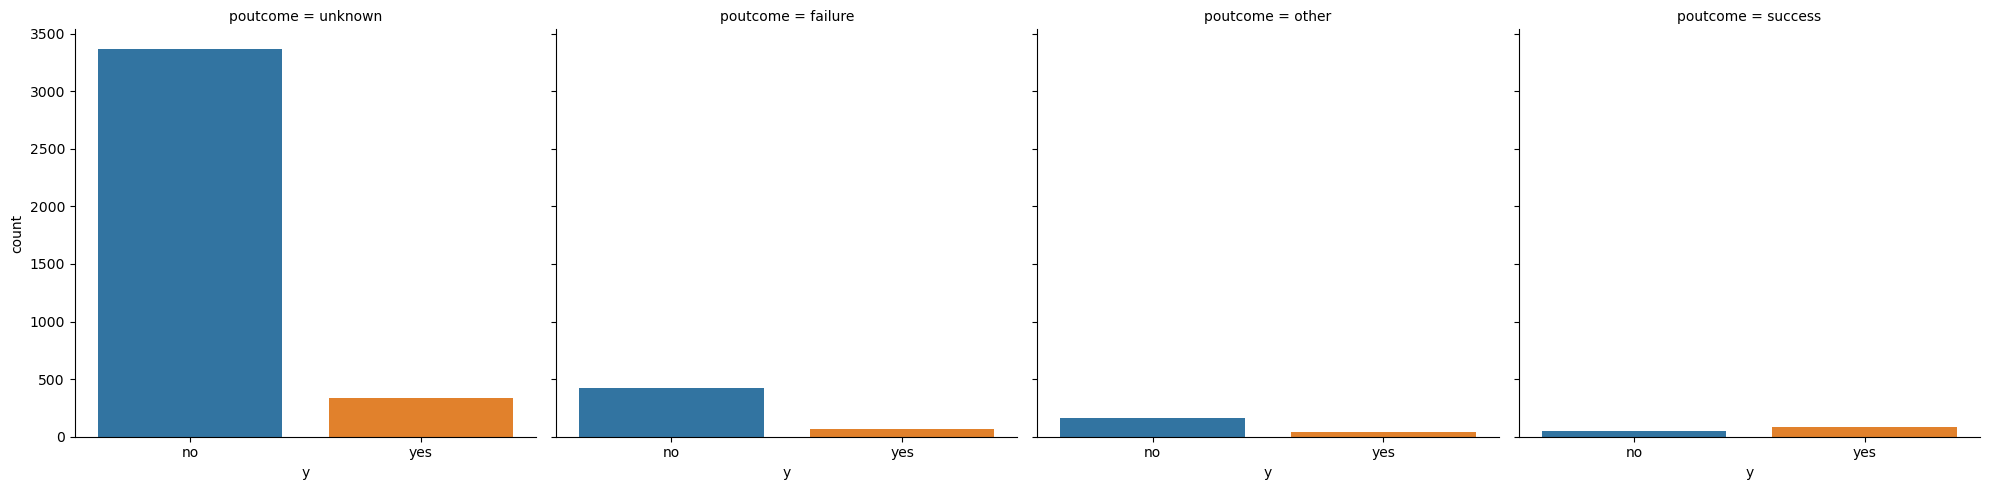

In [144]:
for categ_feature in categ_features:
    sns.catplot(x='y', col=categ_feature, kind='count', data= df)
plt.show()

In [145]:
for categ_feature in categ_features:
    print(df.groupby(['y',categ_feature]).size())

y    job          
no   admin.           420
     blue-collar      877
     entrepreneur     153
     housemaid         98
     management       838
     retired          176
     self-employed    163
     services         379
     student           65
     technician       685
     unemployed       115
     unknown           31
yes  admin.            58
     blue-collar       69
     entrepreneur      15
     housemaid         14
     management       131
     retired           54
     self-employed     20
     services          38
     student           19
     technician        83
     unemployed        13
     unknown            7
dtype: int64
y    marital 
no   divorced     451
     married     2520
     single      1029
yes  divorced      77
     married      277
     single       167
dtype: int64
y    education
no   primary       614
     secondary    2061
     tertiary     1157
     unknown       168
yes  primary        64
     secondary     245
     tertiary      193
     unkn

In [146]:
numerical_f = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['deposit']))]
print('Number of numerical variables: ', len(numerical_f))
df[numerical_f].head()


Number of numerical variables:  7


,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0


In [147]:
discrete_f=[feature for feature in numerical_f if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_f)))

Discrete Variables Count: 1


In [148]:
continuous_f=[feature for feature in numerical_f if feature not in discrete_f+['deposit']]
print("Continuous feature Count {}".format(len(continuous_f)))

Continuous feature Count 6


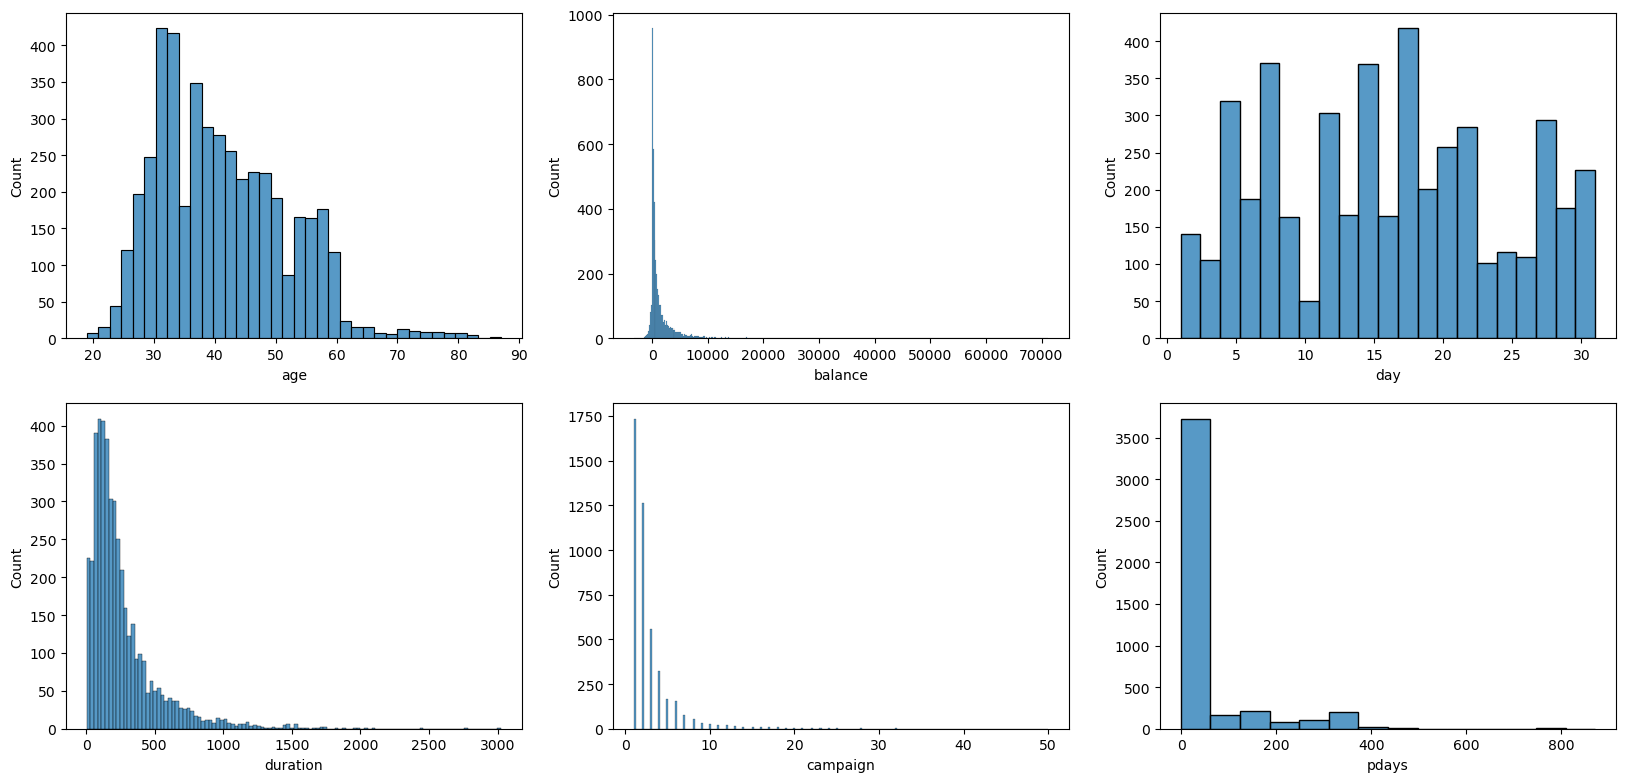

In [149]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_f:
    ax = plt.subplot(12,3,plotnumber)
    sns.histplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

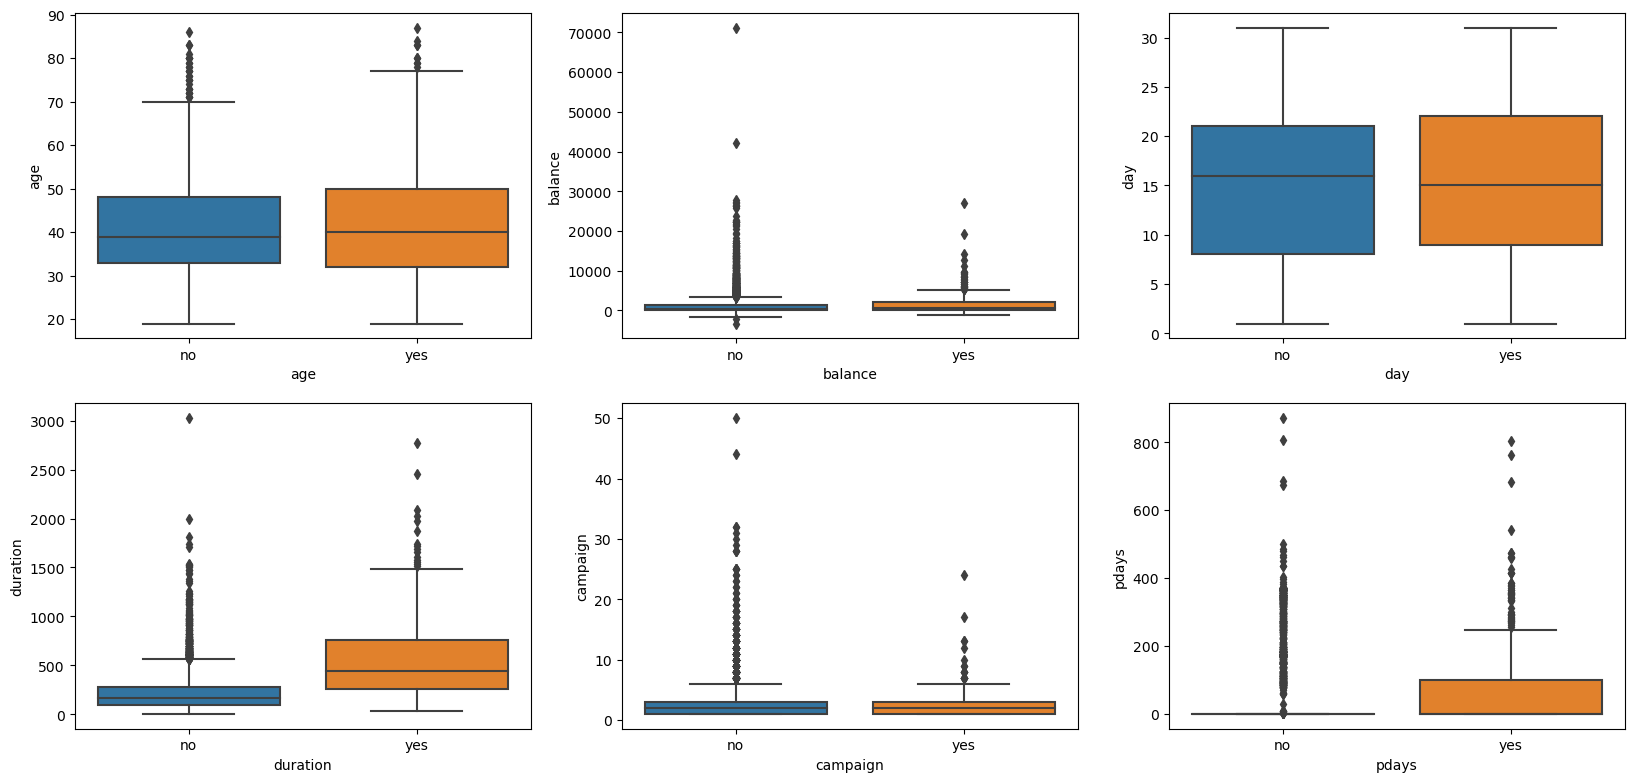

In [150]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_f:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

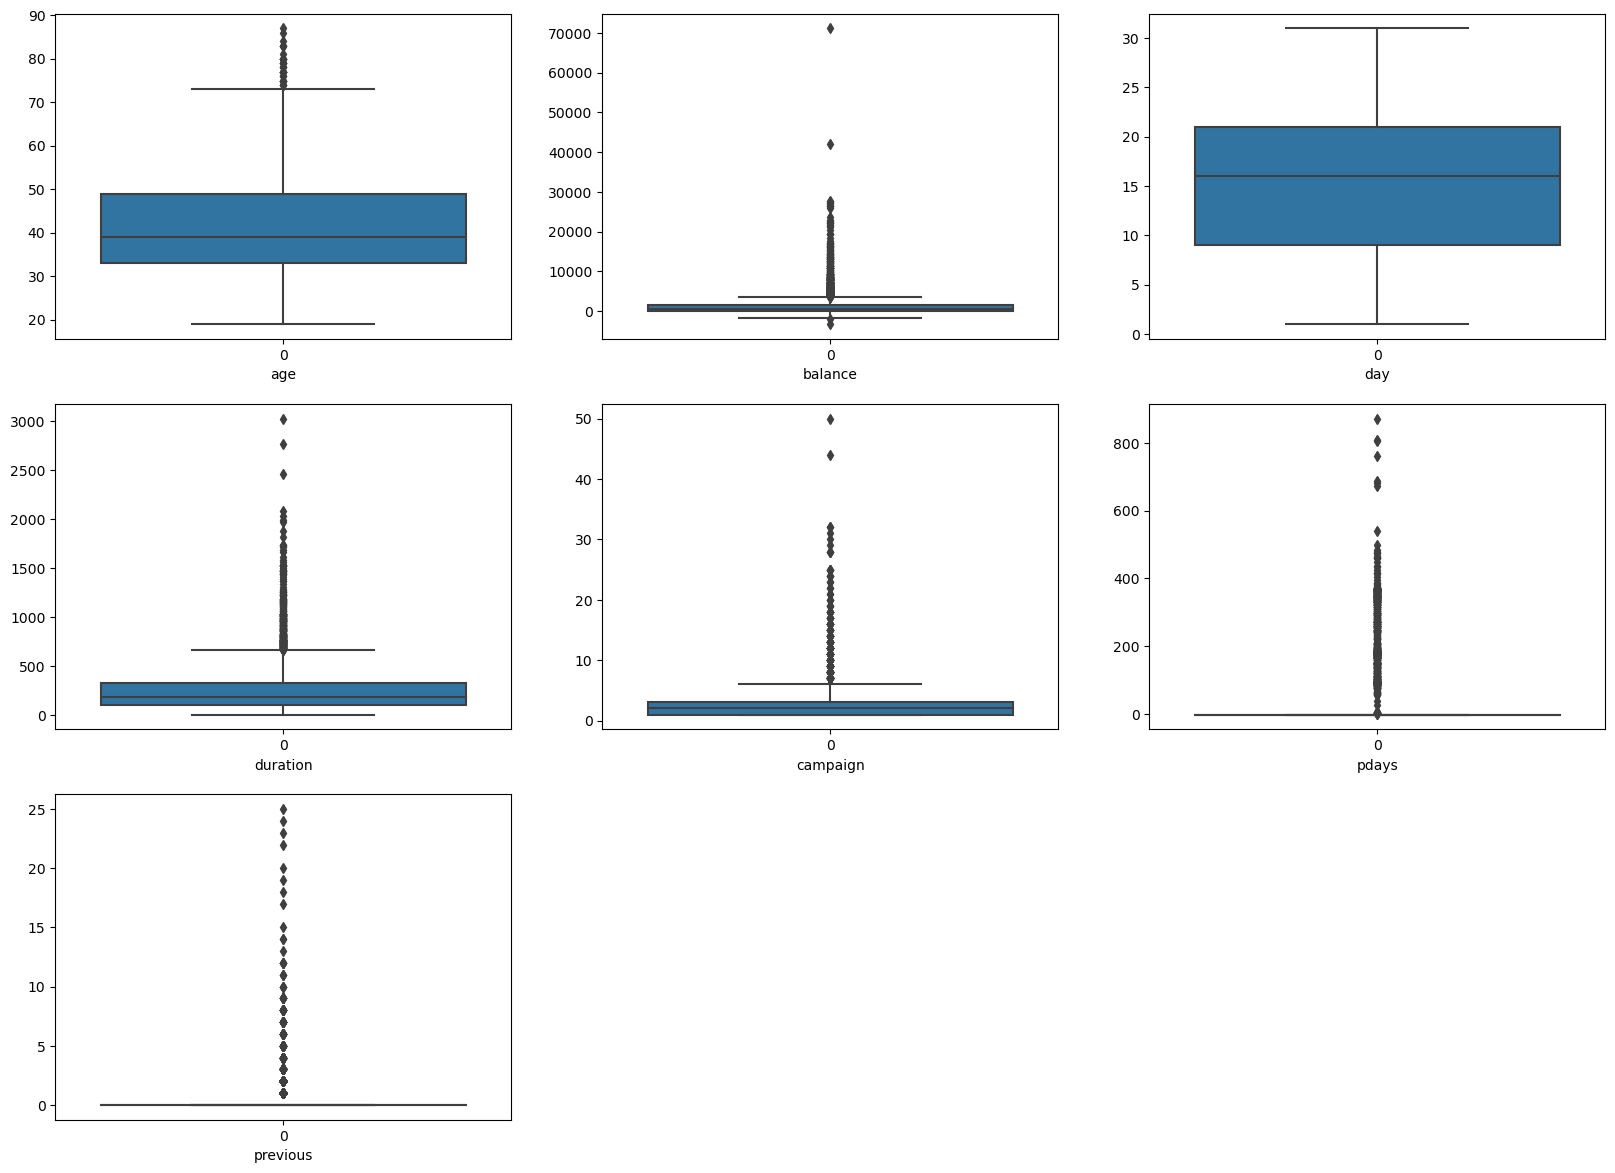

In [151]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_f:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

C:\Users\sande\AppData\Local\Temp\ipykernel_1168\3771475982.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mat=df.corr()


<Axes: >

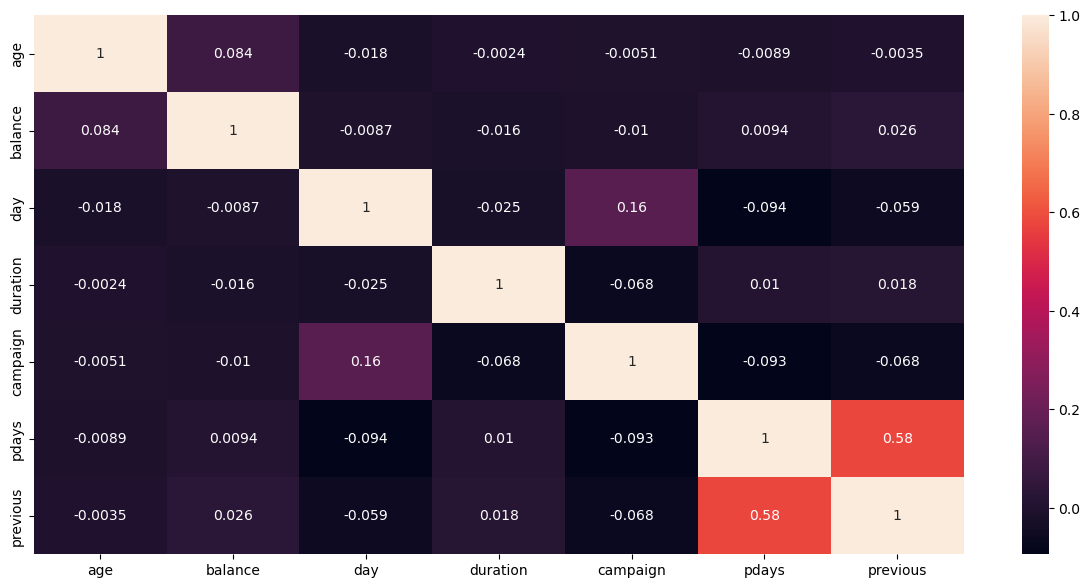

In [152]:
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

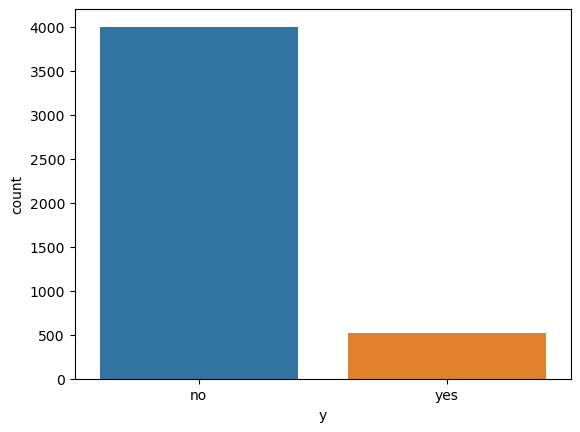

In [153]:
sns.countplot(x='y',data=df)
plt.show()

In [154]:
df['y'].groupby(df['y']).count()

y
no     4000
yes     521
Name: y, dtype: int64

In [155]:
df_2=df.copy()

In [156]:
df_2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [157]:
df_2.shape

(4521, 17)

In [158]:
df_2.groupby(['y','default']).size()

y    default
no   no         3933
     yes          67
yes  no          512
     yes           9
dtype: int64

In [159]:
df_2.drop(['default'],axis=1, inplace=True)

In [160]:
df_2.groupby(['y','pdays']).size()

y    pdays
no   -1       3368
      2          7
      3          1
      5          1
      7          3
              ... 
yes   474        2
      541        1
      683        1
      761        1
      804        1
Length: 371, dtype: int64

In [161]:
df_2.drop(['pdays'],axis=1, inplace=True)

In [162]:
df_2.groupby('age',sort=True)['age'].count()

age
19     4
20     3
21     7
22     9
23    20
      ..
81     1
83     4
84     1
86     1
87     1
Name: age, Length: 67, dtype: int64

In [163]:
df_2.groupby(['y','balance'],sort=True)['balance'].count()

y    balance
no   -3313      1
     -2082      1
     -1746      1
     -1680      1
     -1400      1
               ..
yes   11262     1
      12569     1
      14220     1
      19317     1
      26965     1
Name: balance, Length: 2604, dtype: int64

In [164]:
df_2.groupby(['y','duration'],sort=True)['duration'].count()

y    duration
no   4           1
     5           9
     6           2
     7           6
     8           9
                ..
yes  1971        1
     2029        1
     2087        1
     2456        1
     2769        1
Name: duration, Length: 1149, dtype: int64

In [165]:
df_3 = df_2[df_2['campaign'] < 33]

In [166]:
df_3.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           1494
     2           1126
     3            501
     4            282
     5            158
     6            139
     7             69
     8             52
     9             28
     10            26
     11            22
     12            20
     13            15
     14            10
     15             9
     16             8
     17             6
     18             7
     19             3
     20             3
     21             2
     22             2
     23             2
     24             2
     25             4
     28             3
     29             1
     30             1
     31             1
     32             2
yes  1            240
     2            138
     3             57
     4             43
     5              9
     6             16
     7              6
     8              4
     9              2
     10             1
     12             1
     13             2
     17             1
     24             1
Name: campaign, dt

In [167]:
df_3.groupby(['y','previous'],sort=True)['previous'].count()

y    previous
no   0           3366
     1            235
     2            143
     3             91
     4             53
     5             34
     6             16
     7             19
     8             15
     9              7
     10             2
     11             3
     12             4
     13             1
     15             1
     17             1
     18             1
     19             1
     20             1
     22             1
     23             1
     24             1
     25             1
yes  0            337
     1             51
     2             50
     3             22
     4             25
     5             13
     6              9
     7              3
     8              3
     9              3
     10             2
     12             1
     14             2
Name: previous, dtype: int64

In [168]:
df_4 = df_3[df_3['previous'] < 31]

In [169]:
cate_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for colm in  cate_columns:
    df_4 = pd.concat([df_4.drop(colm, axis=1),pd.get_dummies(df_4[colm], prefix=colm, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [170]:
cate1_columns = ['housing', 'loan', 'y']
for col in  cate1_columns:
    df_4[col+'_new']=df_4[col].apply(lambda x : 1 if x == 'yes' else 0)
    df_4.drop(col, axis=1, inplace=True)

In [171]:
df_4 = pd.get_dummies(df_4)

In [172]:
df_4.head()

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,y_new
0,30,1787,19,79,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,33,4789,11,220,1,4,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,35,1350,16,185,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,30,1476,3,199,4,0,0,0,0,1,...,0,0,0,0,0,0,1,1,1,0
4,59,0,5,226,1,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0


In [173]:
print(df_4)

      age  balance  day  duration  campaign  previous  job_blue-collar  \
0      30     1787   19        79         1         0                0   
1      33     4789   11       220         1         4                0   
2      35     1350   16       185         1         1                0   
3      30     1476    3       199         4         0                0   
4      59        0    5       226         1         0                1   
...   ...      ...  ...       ...       ...       ...              ...   
4516   33     -333   30       329         5         0                0   
4517   57    -3313    9       153         1         0                0   
4518   57      295   19       151        11         0                0   
4519   28     1137    6       129         4         3                1   
4520   44     1136    3       345         2         7                0   

      job_entrepreneur  job_housemaid  job_management  ...  month_may  \
0                    0              0 

In [174]:
X = df_4.drop(['y_new'],axis=1)
y = df_4['y_new']

In [175]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=100)
clf = clf.fit(X.values, y)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X.values)

In [176]:
from sklearn.model_selection import train_test_split

In [177]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.3,stratify=y,random_state=0)

In [178]:
X_train.shape

(3163, 6)

In [179]:
X_test.shape

(1356, 6)

In [180]:
print(y_train)

3922    0
3327    0
542     0
680     0
4491    0
       ..
318     1
1824    0
552     0
3769    0
4048    0
Name: y_new, Length: 3163, dtype: int64


In [181]:
print(y_test)

4067    0
2609    0
2279    0
4457    0
1586    0
       ..
4175    0
797     0
2132    0
4280    0
2181    0
Name: y_new, Length: 1356, dtype: int64


In [182]:
from imblearn.over_sampling import SMOTE

In [183]:
sm = SMOTE(sampling_strategy='auto', random_state=42)

In [184]:
X_train,y_train=sm.fit_resample(X_train,y_train)

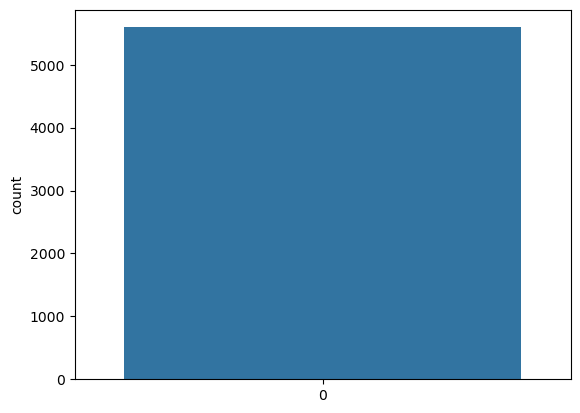

In [185]:
sns.countplot(y_train)
plt.show()

In [186]:
from sklearn.preprocessing import StandardScaler

In [187]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [188]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score
from sklearn.metrics import classification_report

In [189]:
model_comparison={}

In [190]:
classifier=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

[Text(0.4851485328532271, 0.9814814814814815, 'x[3] <= -0.53\ngini = 0.5\nsamples = 5596\nvalue = [2798, 2798]'),
 Text(0.14146216901117087, 0.9444444444444444, 'x[3] <= -0.689\ngini = 0.276\nsamples = 2045\nvalue = [1707, 338]'),
 Text(0.061110105502689284, 0.9074074074074074, 'x[3] <= -0.914\ngini = 0.188\nsamples = 1425\nvalue = [1275, 150]'),
 Text(0.008274720728175424, 0.8703703703703703, 'x[0] <= -1.079\ngini = 0.004\nsamples = 466\nvalue = [465, 1]'),
 Text(0.006619776582540339, 0.8333333333333334, 'x[1] <= -0.192\ngini = 0.043\nsamples = 45\nvalue = [44, 1]'),
 Text(0.004964832436905255, 0.7962962962962963, 'gini = 0.0\nsamples = 34\nvalue = [34, 0]'),
 Text(0.008274720728175424, 0.7962962962962963, 'x[1] <= -0.127\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(0.006619776582540339, 0.7592592592592593, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.00992966487381051, 0.7592592592592593, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.00992966487381051, 0.83333

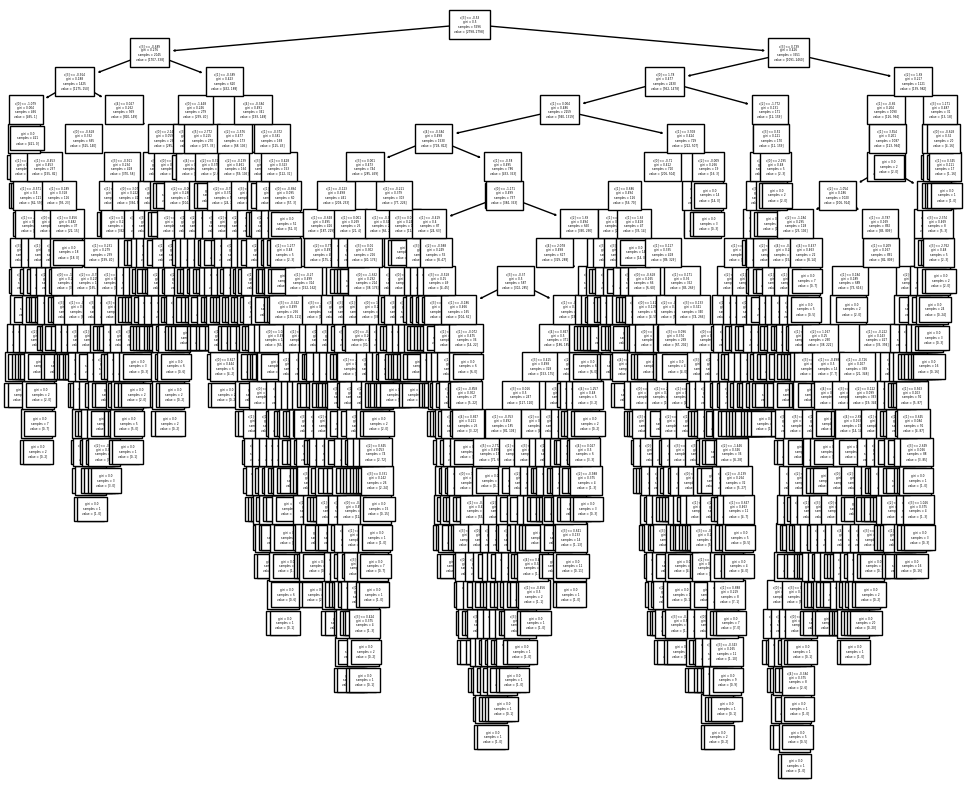

In [191]:
clf = DecisionTreeClassifier() 
clf.fit(X_train, y_train,)
clf.score(X_test, y_test)
plt.figure(figsize=(12,10))
tree.plot_tree(clf,fontsize=2) 

In [192]:
text_represent = tree.export_text(clf)
print(text_represent)

|--- feature_3 <= -0.53
|   |--- feature_3 <= -0.69
|   |   |--- feature_3 <= -0.91
|   |   |   |--- feature_0 <= -1.08
|   |   |   |   |--- feature_1 <= -0.19
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  -0.19
|   |   |   |   |   |--- feature_1 <= -0.13
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  -0.13
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  -1.08
|   |   |   |   |--- class: 0
|   |   |--- feature_3 >  -0.91
|   |   |   |--- feature_4 <= 0.03
|   |   |   |   |--- feature_0 <= -0.62
|   |   |   |   |   |--- feature_1 <= -0.45
|   |   |   |   |   |   |--- feature_1 <= -0.57
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_1 >  -0.57
|   |   |   |   |   |   |   |--- feature_1 <= -0.56
|   |   |   |   |   |   |   |   |--- feature_3 <= -0.86
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_3 >  -0.86
|   |   |   |   |   |   |   |   |

In [193]:
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5,scoring="recall")
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Decision Tree']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 80.01%
Model F1-Score : 77.83%
Cross Val Accuracy: 86.67 %
Cross Val Standard Deviation: 1.81 %
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1085
           1       0.50      0.29      0.37       271

    accuracy                           0.80      1356
   macro avg       0.67      0.61      0.62      1356
weighted avg       0.77      0.80      0.78      1356



In [194]:
classifier=RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Random Forest']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 82.30%
Model F1-Score : 80.56%
Cross Val Accuracy: 86.62 %
Cross Val Standard Deviation: 0.67 %
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1102
           1       0.54      0.33      0.41       254

    accuracy                           0.82      1356
   macro avg       0.70      0.64      0.66      1356
weighted avg       0.80      0.82      0.81      1356



In [195]:
classifier=GaussianNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Naive Bayes']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 86.58%
Model F1-Score : 85.62%
Cross Val Accuracy: 70.55 %
Cross Val Standard Deviation: 1.85 %
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1136
           1       0.62      0.44      0.52       220

    accuracy                           0.87      1356
   macro avg       0.76      0.69      0.72      1356
weighted avg       0.85      0.87      0.86      1356



In [205]:
Model_com_df=pd.DataFrame(model_comparison).T
Model_com_df.columns=['Model Accuracy','Model F1-Score','CV Accuracy','CV std']
Model_com_df=Model_com_df.sort_values(by='Model F1-Score',ascending=False)
Model_com_df.style.format("{:.2%}").background_gradient(cmap='Reds')

,Model Accuracy,Model F1-Score,CV Accuracy,CV std
Naive Bayes,86.58%,85.62%,70.55%,1.85%
Random Forest,82.30%,80.56%,86.62%,0.67%
Decision Tree,80.01%,77.83%,86.67%,1.81%


In [206]:
Model_com_df.style.highlight_max().set_caption("Maximum Score in each Column").format("{:.2%}")

,Model Accuracy,Model F1-Score,CV Accuracy,CV std
Naive Bayes,86.58%,85.62%,70.55%,1.85%
Random Forest,82.30%,80.56%,86.62%,0.67%
Decision Tree,80.01%,77.83%,86.67%,1.81%


In [207]:
Model_com_df.style.highlight_min().set_caption("Minimum Score in each Column").format("{:.2%}")

,Model Accuracy,Model F1-Score,CV Accuracy,CV std
Naive Bayes,86.58%,85.62%,70.55%,1.85%
Random Forest,82.30%,80.56%,86.62%,0.67%
Decision Tree,80.01%,77.83%,86.67%,1.81%


In [208]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,classifier.predict(X_test))
cm

array([[1077,  123],
       [  59,   97]], dtype=int64)

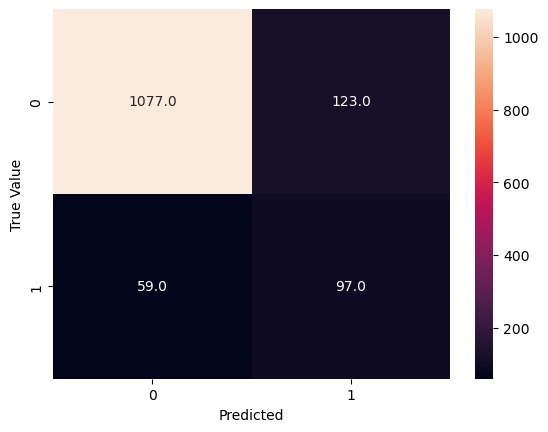

In [211]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True,fmt=".1f")
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()